In [1]:
from math import pi
import numpy as np
import math
import random

In [2]:
l_limit = -1          #Limits of the integration over theta space
u_limit = 1
d = 40               #no of parameters in the circuit
gamma = 1          #hyperparameter in calculation of effective dimension

<img src="Images/Vtheta.png">

In [3]:
Vtheta = (u_limit - l_limit)**d      #Volume integral over the theta space (as the formula above)

<img src="Images/sum_traces.png">

In [4]:
def sum_traces(fubini_matrices):     #Calculates the sum of traces of all the Fubini Matrices, to be used in integration       
    sTrace = 0
    for i in range(len(fubini_matrices)):
        sTrace += np.trace(fubini_matrices[i])
    return sTrace

def int_traces(fubini_matrices, num_matrices):   #Computed the integral of tr(F(theta)) over theta space
    return ((u_limit-l_limit)**d)*sum_traces(fubini_matrices)/num_matrices

<img src="Images/normalisedFisher.png">

In [5]:
def normalisedFisher(ind, fubini_matrices, num_matrices):  #Computes the normalised Fisher Matrix for a single Fubini Matrix at index ind in the list
    return d*Vtheta*(fubini_matrices[ind])/(int_traces(fubini_matrices, num_matrices))

<img src="Images/func_eff.png">

In [6]:
def func_effDim(matrix, n, gamma):  #Computes the function inside the integral (square root term in numerator) for effective dimension calculation
    factor = gamma*n/(2*pi*math.log10(n))
    determinant_value = np.identity(d) + factor*matrix
    return (np.linalg.det(determinant_value))**0.5

<img src="Images/int_eff.png">

In [7]:
def int_effDim(normalisedMatrices, n, num_matrices): #Computes the integral present in numerator of effective dimension formula
    sum_dets = 0
    for i in range(len(normalisedMatrices)):
        sum_dets += func_effDim(normalisedMatrices[i], n, gamma)
    return ((u_limit-l_limit)**d)*sum_dets/num_matrices

<img src="Images/eff_dim.png">

In [8]:
def eff_dim(fubini_matrices, n, gamma, num_matrices):  #Computes the effective dimension according to the equation-2 (given above)
    normalisedMatrices = []
    for i in range(len(fubini_matrices)):
        normalisedMatrices.append(normalisedFisher(i, fubini_matrices, num_matrices))
    factor = gamma*n/(2*pi*math.log10(n))
    return 2*math.log10(int_effDim(normalisedMatrices, n, num_matrices)/Vtheta)/math.log10(factor)

In [9]:
import pickle    #importing the fisher matrices stored in the pickle file
file_name = "EasyQuantumnormal1040.pkl"
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()

In [10]:
fubini_matrices = loaded_list[3]
print(len(fubini_matrices))

50


[0.9453581788657208, 0.9448637713849418, 0.9448400413985791, 0.9446414659108113, 0.9447186977927917]


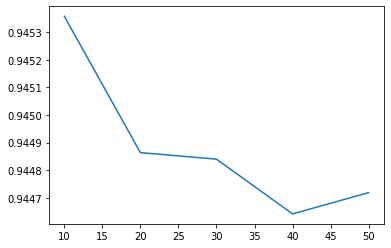

In [20]:
eff_dimsb = [ ]           #Computes effective dimension for the 500 fisher matrices    
 
for j in range(10, 51, 10):   #no of datapoints
    eff_dimsb.append(eff_dim(fubini_matrices[:j], 10**9, 1, j) / d)
    
print(eff_dimsb)
plt.plot([10,20,30,40,50], eff_dimsb)

In [12]:
eff_dims = [ ]           #Computes effective dimension for the 500 fisher matrices 
dataV = [ ]   
 
for i in np.linspace(0.1, 1.0, 20): #gamma values
    eff_dimV = []
    data = []
    for j in range(10, 51, 10):   #no of datapoints
        data.append(j)
        eff_dimV.append(eff_dim(fubini_matrices[:j], 10**6, i, j) / d)
    
    eff_dims.append(eff_dimV)
    dataV.append(data)

In [13]:
dataPoints = [i for i in range(10,51,10)]

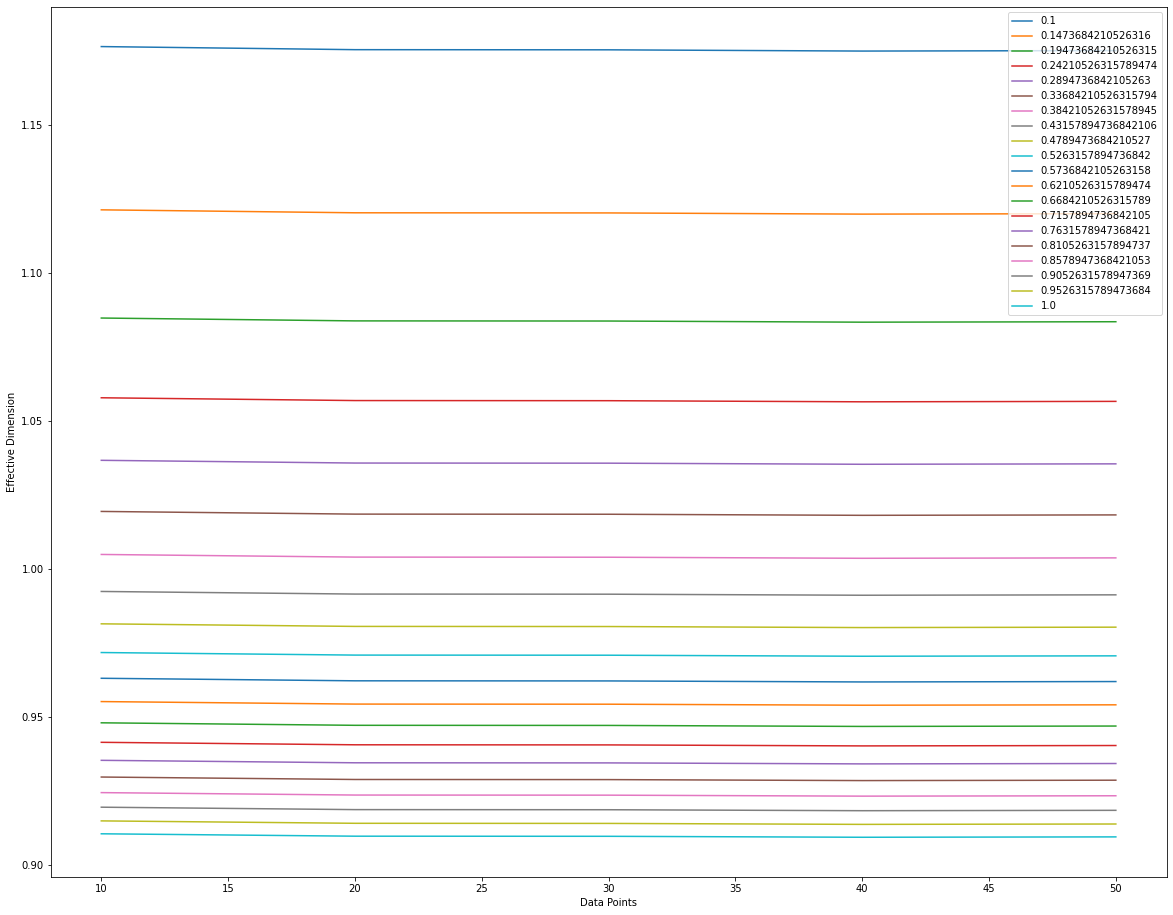

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20, 16])

for i in range(20):
    plt.plot(dataPoints, eff_dims[i])
        
legendList = ['{}'.format(i) for i in np.linspace(0.1, 1.0, num = 20)]
plt.xlabel('Data Points')
plt.ylabel('Effective Dimension')
plt.legend(legendList)
#plt.savefig('EffDimsGraphQNN')
plt.show()